# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [30]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [31]:
# Add any additional import statements you need here

import string
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# change `data_location` to the location of the folder on your machine.
#data_location = "/users/rsadeghian/textmining/ads-tm-api-scrape/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "/Users/sahilwadhwa/M1 Results/twitter/"
lyrics_folder = "/Users/sahilwadhwa/M1 Results/lyrics/"

positive_words_file = "/Users/sahilwadhwa/positive-words.txt"
negative_words_file = "/Users/sahilwadhwa/negative-words.txt"
tidy_text_file = "/Users/sahilwadhwa/tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [33]:
# Read in the lyrics data
lyrics_data = {}
for artist in os.listdir(lyrics_folder):
    join = os.path.join(lyrics_folder, artist) 
    if os.path.isdir(join):
        lyrics_data[artist] = {}  
        for file in os.listdir(join):
            path = os.path.join(join, file)
            if os.path.isfile(path):
                with open(path, 'r', encoding='utf-8') as f:
                    read = f.read()  
                    title = os.path.splitext(file)[0]
                    lyrics_data[artist][title] = read              

In [34]:
# Read in the twitter data
twitter_data = {}
for artist_file in os.listdir(twitter_folder):
    join = os.path.join(twitter_folder, artist_file)
    if os.path.isfile(join) and artist_file.endswith("_followers_data.txt"):
        artist = artist_file.replace("_followers_data.txt", "")
        twitter_data[artist] = []

        with open(join, 'r', encoding='utf-8') as f:
            for line in f:
                text = line.strip()
                twitter_data[artist].append(text)

In [35]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

sentiment_data = {}

#Positivve
with open(positive_words_file, 'r', encoding = 'utf-8') as pf:
    for line in pf:
        word = line.strip().lower()
        if word and not word.startswith(";"):  
            sentiment_data[word] = 1

#Negative
with open(negative_words_file, 'r', encoding='utf-8') as nf:
    for line in nf:
        word = line.strip().lower()
        if word and not word.startswith(";"):  
            sentiment_data[word] = -1
            
#Tidy
tidytext_df = pd.read_csv(tidy_text_file, sep='\t')
tidytext_df['assign'] = tidytext_df['sentiment'].map({'positive': 1, 'negative': -1})
tidy_dict = dict(zip(tidytext_df['word'], tidytext_df['assign']))
sentiment_data.update(tidy_dict)

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [36]:
# your code here

sentiments = []
for artist, songs in lyrics_data.items():
    for title, lyrics in songs.items():
        cleaned = lyrics.lower()
        cleaned = cleaned.translate(str.maketrans('', '', string.punctuation))
        words = cleaned.split()
        score = sum(sentiment_data.get(word, 0) for word in words)
        sentiments.append({
            "artist": artist,
            "song": title.replace(f"{artist}_", ""),
            "sentiment_score": score
        })

# Create a DataFrame with the results
sentiment_df = pd.DataFrame(sentiments)
sentiment_df.head()

,artist,song,sentiment_score
0,robyn,includemeout,12
1,robyn,electric,23
2,robyn,beach2k20,26
3,robyn,lovekills,-24
4,robyn,timemachine,-8


### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: The artist with the higher average sentiment is robyn

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The songs with the three highest sentiments are loveisfree, wedancetothebeat114528 and wedancetothebeat. The songs with the three lowest sentiments are  dontfuckingtellmewhattodo, dontfuckingtellmewhattodo114520 and criminalintent. I think the sentiment scores is being driven by the positive or negative words used in the lyrics

---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The songs with the three highest sentiments are loveandunderstanding, ifoundyoulove and perfection. The songs with the three lowest sentiments are bangbang, bangbangmybabyshotmedown and outrageous. I think the sentiment scores is being driven by the positive or negative words used in the lyrics      

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.




In [37]:
#Question1
artist_avg = sentiment_df.groupby('artist')['sentiment_score'].mean()
print(artist_avg)

#Question2
first_artist = sentiment_df['artist'].unique()[0]
songs = sentiment_df[sentiment_df['artist'] == first_artist]
top3_high = songs.nlargest(3, 'sentiment_score')
top3_low = songs.nsmallest(3, 'sentiment_score')
print(top3_high, top3_low)
for s in top3_high['song']:
    print(s)
    print(lyrics_data[first_artist][f"{first_artist}_{s}"])

for s in top3_low['song']:
    print(s)
    print(lyrics_data[first_artist][f"{first_artist}_{s}"])

artist
cher     6.601266
robyn    8.865385
Name: sentiment_score, dtype: float64
   artist                    song  sentiment_score
21  robyn              loveisfree              127
50  robyn  wedancetothebeat114528               68
98  robyn        wedancetothebeat               68    artist                             song  sentiment_score
53  robyn        dontfuckingtellmewhattodo              -91
75  robyn  dontfuckingtellmewhattodo114520              -91
16  robyn                   criminalintent              -52
loveisfree
"Love Is Free"



Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby
Chica boom chica boom chica boom
Chica boom chica boom chica boom
Free
Love is free, baby
Free
Love is free, baby
Boom boom boom boom boom chica boom
Let me give it to you, baby

I'ma give it to you, baby
I'ma give it when I'm ready
Some lose, some steady
Some light, some heavy
It's all over this city
Sometimes in the ugly, sometime

In [38]:
#Question3
second_artist = sentiment_df['artist'].unique()[1]
songs_2 = sentiment_df[sentiment_df['artist'] == second_artist]
top3_high_2 = songs_2.nlargest(3, 'sentiment_score')
top3_low_2 = songs_2.nsmallest(3, 'sentiment_score')
print(top3_high_2, top3_low_2)
for s in top3_high_2['song']:
    print(s)
    print(lyrics_data[second_artist][f"{second_artist}_{s}"])

for s in top3_low_2['song']:
    print(s)
    print(lyrics_data[second_artist][f"{second_artist}_{s}"])

    artist                  song  sentiment_score
250   cher  loveandunderstanding               60
338   cher         ifoundyoulove               57
207   cher            perfection               50     artist                      song  sentiment_score
145   cher                  bangbang              -71
299   cher  bangbangmybabyshotmedown              -35
262   cher                outrageous              -31
loveandunderstanding
"Love And Understanding"



Here, here in this world
Where do we go? Where can we turn?
When we need some love
It seems that love just can't be found
Where, where do we stand?
When love's supply don't meet love's demand

We got enough stars to light the sky at night
Enough sun to make to make the whole world bright
We got more than enough
But there's one thing there's just not enough of

Not enough love and understanding
We could use some love to ease these troubled times
Not enough love and understanding
Why, oh why?

Spend all of our time
Building buildin

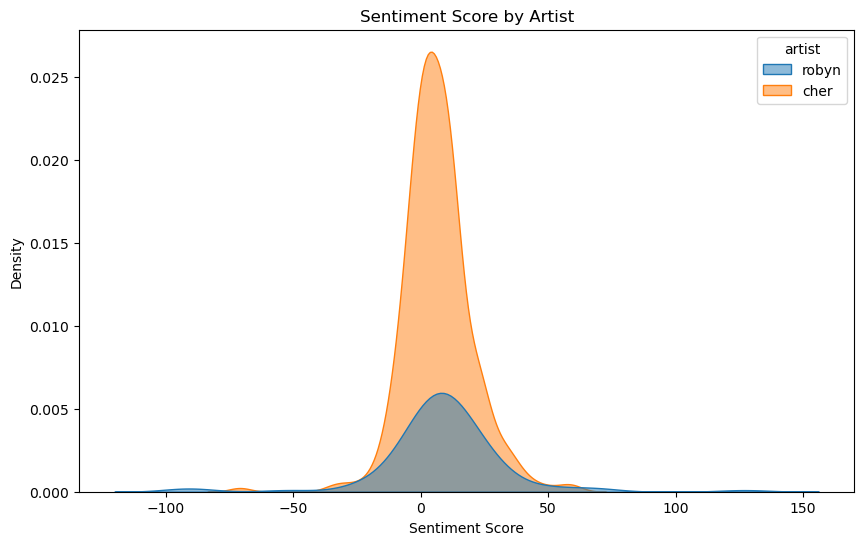

In [39]:
#Question 4

plt.figure(figsize=(10,6))
sns.kdeplot(data = sentiment_df, x = "sentiment_score", hue = "artist", fill = True, alpha = 0.5)
plt.title("Sentiment Score by Artist")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.show()

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [40]:
# your code here
positive_emojis = {'😊', '😂', '❤️', '😍', '😁', '🥰', '😎', '🎉', '🌟', '😇'}
negative_emojis = {'😢', '😠', '💔', '😭', '😞', '😤', '👎', '🤬', '😔', '🙁'}
sentiment = {}
sentiment.update({emoji: 1 for emoji in positive_emojis})
sentiment.update({emoji: -1 for emoji in negative_emojis})

In [41]:
#Twitter
avg_sentiments = {}
for artist, content in twitter_data.items():
    total_score = 0
    count = 0
    for c in content:
        score = 0
        for char in c:
            score += sentiment.get(char, 0)
        total_score += score
        count += 1
    avg_sentiments[artist] = total_score / count if count > 0 else 0

print(avg_sentiments)

{'cher': 0.00888679394533499, 'robynkonichiwa': 0.003995836739932975}


Q: What is the average sentiment of your two artists? 

A: Cher': 0.00888679394533499, Robyn: 0.003995836739932975

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: The most popular emoji for each artist is the smiley face while the negative emoji is the heartbreak

